In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
import Higgs
from Higgs import predictions as HP
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV

## `H > emu` [1807.06573](https://arxiv.org/abs/1807.06573)

Looks good. Saving this to H_emu_LHC13_ATLAS_36.json


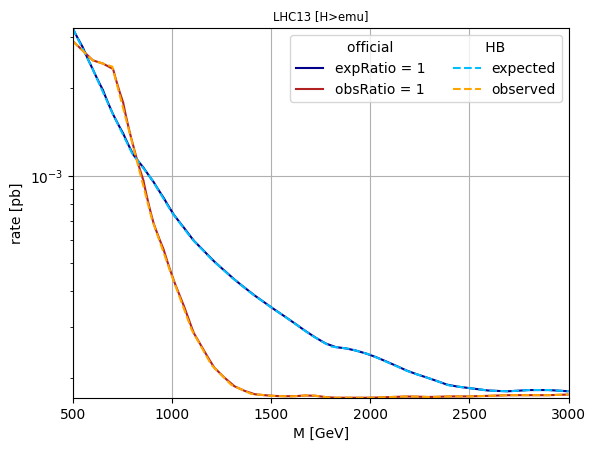

In [2]:
df = fromHB5Table1("180706573_Atlas_H-emu_36.1fb-1", "ATLAS")
df.obs = np.around(df.obs, 7)
df.exp = np.around(df.exp, 7)

process = {"channels": [["H", "emu"]]}
limitFile = implementChannelLimit(
    "1807.06573",
    process,
    "Fig. 4",
    df,
    idSuffix=1,
    prefix="H_emu",
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H > etau` [1807.06573](https://arxiv.org/abs/1807.06573)

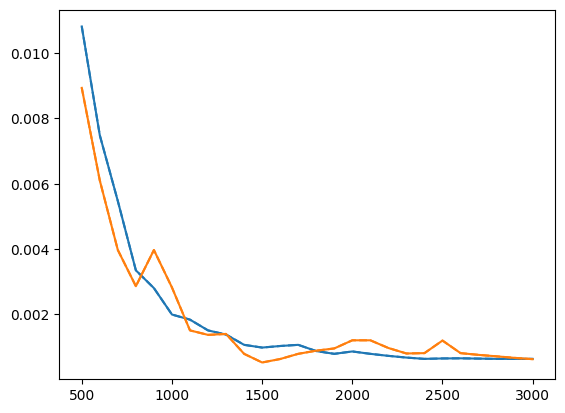

Looks good. Saving this to H_etau_LHC13_ATLAS_36.json


In [3]:
df = fromHB5Table1("180706573_Atlas_H-etau_36.1fb-1", "ATLAS")
df.obs = np.around(df.obs, 7)
df.exp = np.around(df.exp, 7)

process = {"channels": [["H", "etau"]]}
limitFile = implementChannelLimit(
    "1807.06573",
    process,
    "Fig. 5",
    df,
    idSuffix=2,
    prefix="H_etau",
    massResolution=resolution.tautau["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H > mutau` [1807.06573](https://arxiv.org/abs/1807.06573)

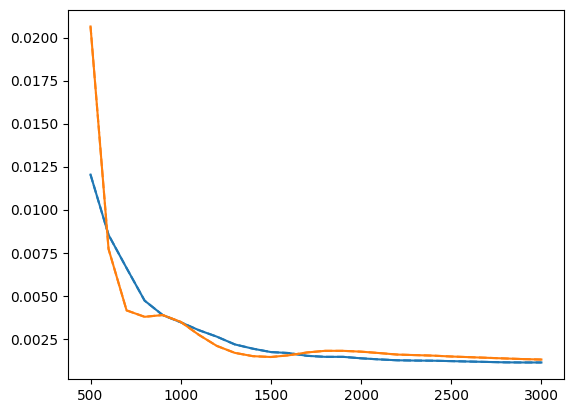

Looks good. Saving this to H_mutau_LHC13_ATLAS_36.json


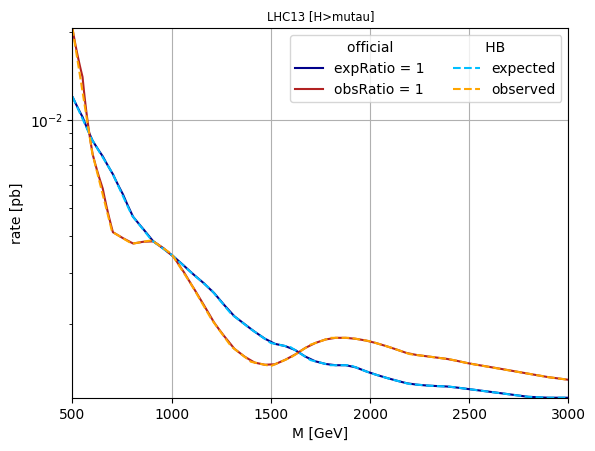

In [4]:
df = fromHB5Table1("180706573_Atlas_H-mutau_36.1fb-1", "ATLAS")
df.obs = np.around(df.obs, 7)
df.exp = np.around(df.exp, 7)

process = {"channels": [["H", "mutau"]]}
limitFile = implementChannelLimit(
    "1807.06573",
    process,
    "Fig. 6",
    df,
    idSuffix=3,
    prefix="H_mutau",
    massResolution=resolution.tautau["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `ggH > emu` [1807.06573](https://arxiv.org/abs/1807.06573)

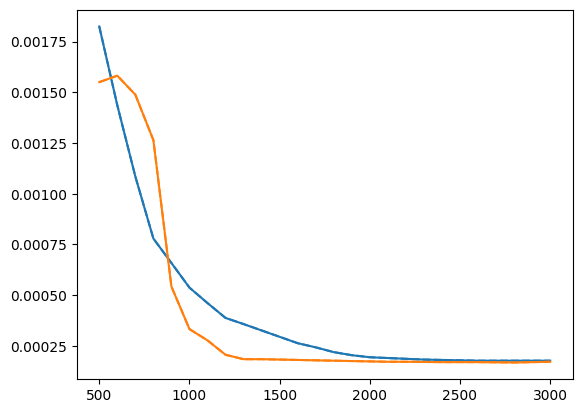

Looks good. Saving this to ggH_emu_LHC13_ATLAS_36.json


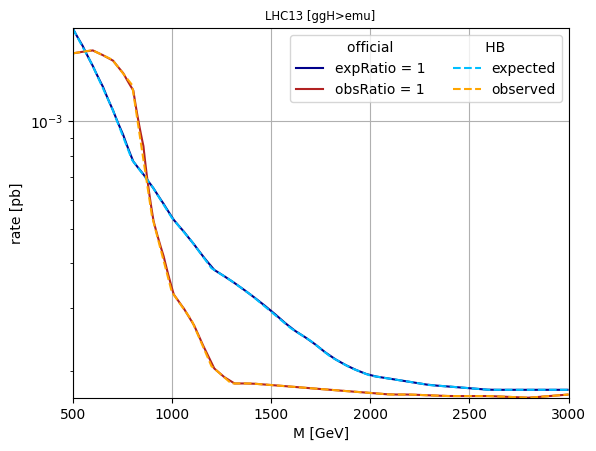

In [5]:
df = fromHB5Table1("180706573_Atlas_ggH-emu_36.1fb-1", "ATLAS")
df.obs = np.around(df.obs, 7)
df.exp = np.around(df.exp, 7)

process = {"channels": [["ggH", "emu"]]}
limitFile = implementChannelLimit(
    "1807.06573",
    process,
    "Fig. 4",
    df,
    idSuffix=4,
    prefix="ggH_emu",
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `h125 > mutau` [1907.06131](https://arxiv.org/abs/1907.06131)

In [6]:
df = pd.DataFrame({"m": [125], "obs": [0.0028], "exp": [0.0037]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "mutau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1907.06131",
    process,
    "Fig. 4b",
    df,
    idSuffix=2,
    prefix="h125_mutau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("mutau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("mutau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_mutau_LHC13_ATLAS_36.json


## `h125 > etau` [1907.06131](https://arxiv.org/abs/1907.06131)

In [7]:
df = pd.DataFrame({"m": [125], "obs": [0.0047], "exp": [0.0034]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "etau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1907.06131",
    process,
    "Fig. 4a",
    df,
    idSuffix=1,
    prefix="h125_etau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("etau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("etau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_etau_LHC13_ATLAS_36.json


## `h125 > e mu` [1909.10235](https://arxiv.org/abs/1909.10235)

In [8]:
df = pd.DataFrame({"m": [125], "obs": [6.2e-5], "exp": [5.9e-5]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "emu"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1909.10235",
    process,
    "p. 7",
    df,
    idSuffix=2,
    prefix="h125_emu",
    massResolution={"relative": 0, "absolute": 6},  # +- 3 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(124)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("emu", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("emu", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_emu_LHC13_ATLAS_139.json


# ATLAS 8TeV

## `h125 > mutau` [1604.07730](https://arxiv.org/abs/1604.07730)

In [9]:
df = pd.DataFrame({"m": [125], "obs": [1.43e-2], "exp": [1.01e-2]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "mutau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1604.07730",
    process,
    "p. 19",
    df,
    idSuffix=2,
    prefix="h125_mutau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("mutau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("mutau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_mutau_LHC8_ATLAS_20.json


## `h125 > etau` [1604.07730](https://arxiv.org/abs/1604.07730)

In [10]:
df = pd.DataFrame({"m": [125], "obs": [1.04e-2], "exp": [1.21e-2]})
prodModes = ["ggH", "vbfH", "HZ", "HW"]  # b-jet veto
process = {"channels": [[p, "etau"] for p in prodModes]}
limitFile = implementChannelLimit(
    "1604.07730",
    process,
    "p. 19",
    df,
    idSuffix=1,
    prefix="h125_etau",
    massResolution={"relative": 0, "absolute": 10},  # +- 5 GeV
    normalization={
        "reference": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
    constraints={
        "modelLike": "SMHiggsInterp",
        "process": {"channels": [[p, "none"] for p in prodModes]},
    },
)
lim = HB.Limit(limitFile)
# only one datapoint, so the plot is empty and the automatic validation script
# doesn't do anything
pred = Higgs.Predictions()
h = pred.addParticle(HP.NeutralScalar("h", "even"))
h.setMass(125)
HP.effectiveCouplingInput(
    h,
    HP.smLikeEffCouplings,
    reference="SMHiggsInterp")
h.setBr("bb", 0)  # creates some space in the BRs
h.setBr("etau", df.exp[0])
assert np.isclose(lim.apply(pred)[0].expRatio(), 1)
h.setBr("etau", df.obs[0])
assert np.isclose(lim.apply(pred)[0].obsRatio(), 1)


Looks good. Saving this to h125_etau_LHC8_ATLAS_20.json


## `H -> emu` [1503.04430](https://arxiv.org/abs/1503.04430)
Using RPV sneutrino limit.

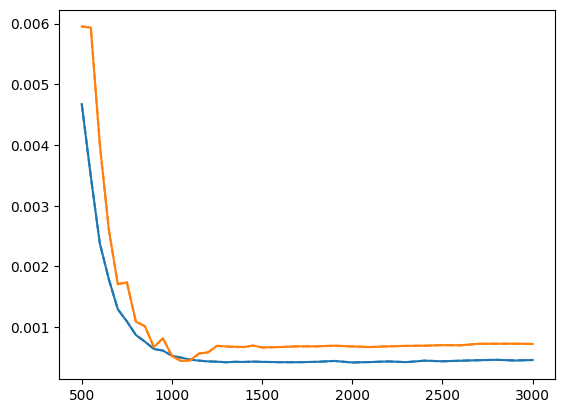

Looks good. Saving this to H_emu_LHC8_ATLAS_20.json


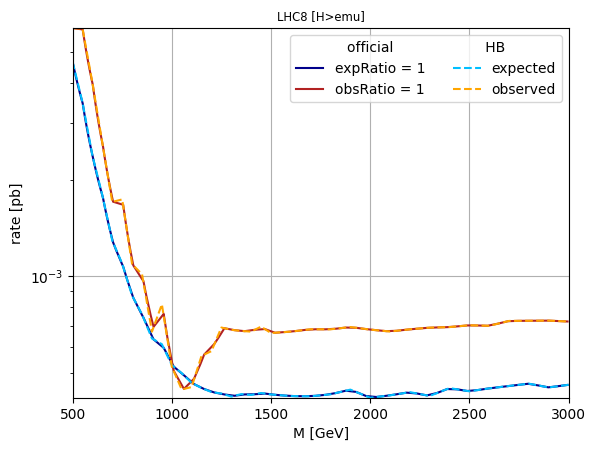

In [11]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1352821/Table%208/1/csv"
)
df = dfs[0].rename(columns={"M(SNEUTRINO) [GEV]": "m", "LIMIT [FB]": "obs"})
df["exp"] = dfs[3]["LIMIT [FB]"]
df.obs *= 1e-3  # fb to pb
df.exp *= 1e-3

process = {"channels": [["H", "emu"]]}
limitFile = implementChannelLimit(
    "1503.04430",
    process,
    "https://doi.org/10.17182/hepdata.68482.v1/t8",
    df,
    idSuffix=1,
    prefix="H_emu",
    massResolution=resolution.mumu["light"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H -> etau` [1503.04430](https://arxiv.org/abs/1503.04430)
Using RPV sneutrino limit.

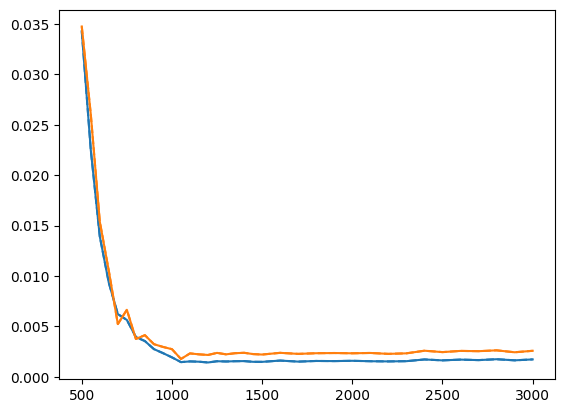

Looks good. Saving this to H_etau_LHC8_ATLAS_20.json


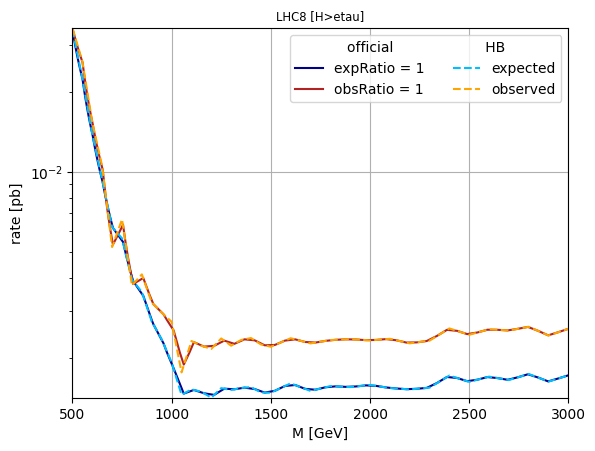

In [12]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1352821/Table%2011/1/csv"
)
df = dfs[0].rename(columns={"M(SNEUTRINO) [GEV]": "m", "LIMIT [FB]": "obs"})
df["exp"] = dfs[3]["LIMIT [FB]"]
df.obs *= 1e-3  # fb to pb
df.exp *= 1e-3

process = {"channels": [["H", "etau"]]}
limitFile = implementChannelLimit(
    "1503.04430",
    process,
    "https://doi.org/10.17182/hepdata.68482.v1/t11",
    df,
    idSuffix=2,
    prefix="H_etau",
    massResolution=resolution.tautau["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H -> mutau` [1503.04430](https://arxiv.org/abs/1503.04430)
Using RPV sneutrino limit.

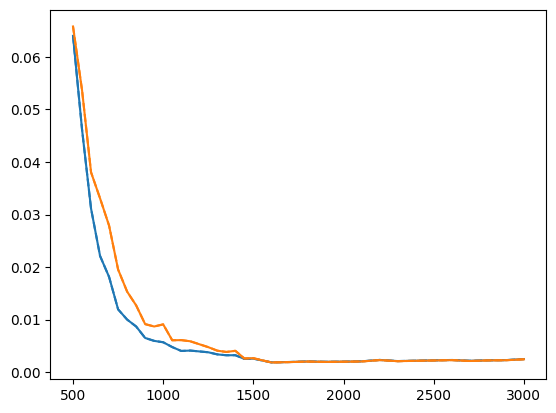

Looks good. Saving this to H_mutau_LHC8_ATLAS_20.json


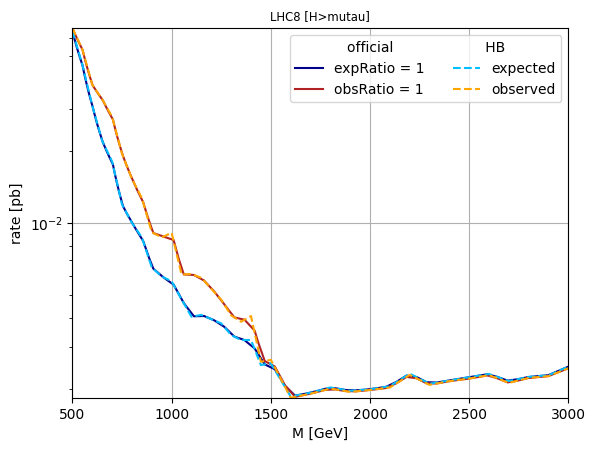

In [13]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1352821/Table%2013/1/csv"
)
df = dfs[0].rename(columns={"M(SNEUTRINO) [GEV]": "m", "LIMIT [FB]": "obs"})
df["exp"] = dfs[3]["LIMIT [FB]"]
df.obs *= 1e-3  # fb to pb
df.exp *= 1e-3

process = {"channels": [["H", "mutau"]]}
limitFile = implementChannelLimit(
    "1503.04430",
    process,
    "https://doi.org/10.17182/hepdata.68482.v1/t13",
    df,
    idSuffix=3,
    prefix="H_mutau",
    massResolution=resolution.tautau["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
